<ipython-input-3-ee34e9477761>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Accuracy: 0.8513660817890925

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.75      0.50      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439


🧾 Confusion Matrix:


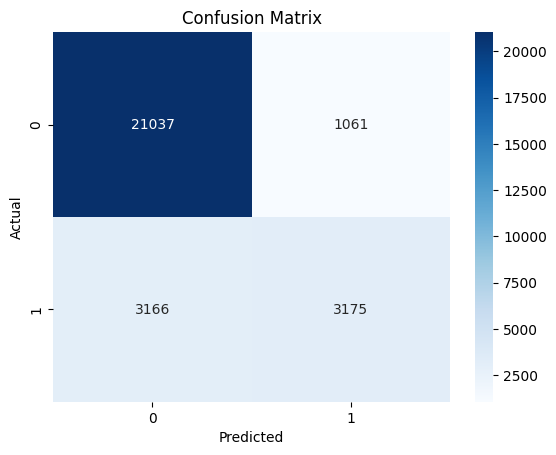

<ipython-input-3-ee34e9477761>:70: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


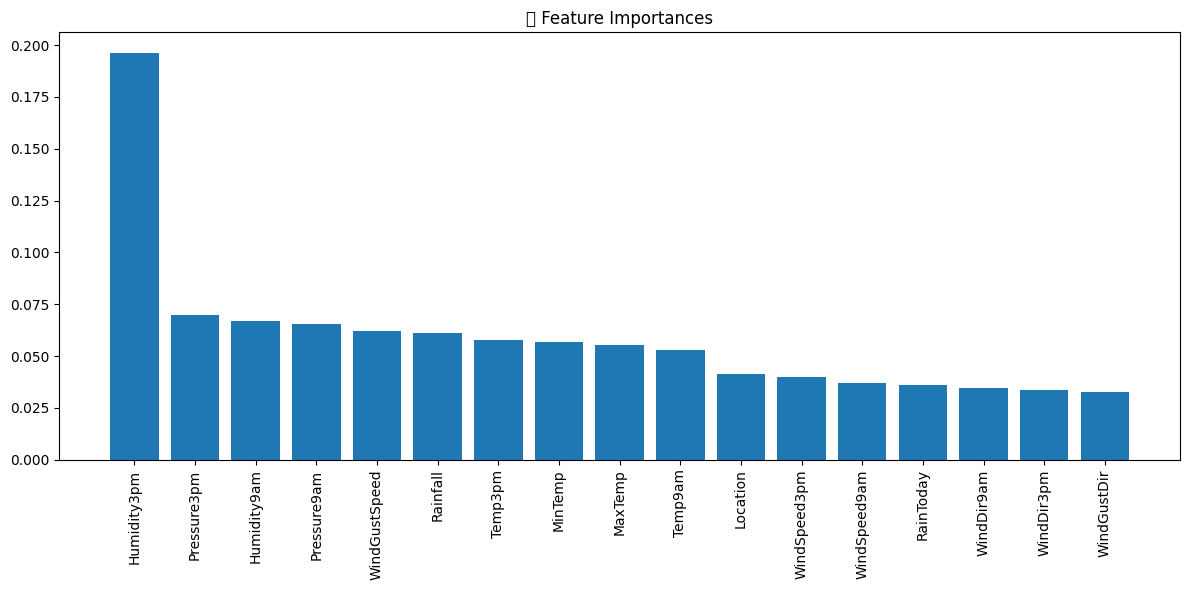

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/weatherAUS.csv')

# Drop rows where target value is missing
df.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with excessive missing data
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Fill numeric missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill categorical missing values using forward fill
df.fillna(method='ffill', inplace=True)

# Encode categorical columns
label_cols = ['RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(['RainTomorrow', 'Date'], axis=1)
y = df['RainTomorrow']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Feature Importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("📈 Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset
df = pd.read_csv('/content/weatherAUS.csv.zip')

# Step 2: Drop high-missing and irrelevant columns
df.drop(['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Step 3: Drop rows where target (RainTomorrow) is missing
df.dropna(subset=['RainTomorrow'], inplace=True)

# Step 4: Fill remaining missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(method='ffill', inplace=True)

# Step 5: Encode categorical columns
le = LabelEncoder()
for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']:
    df[col] = le.fit_transform(df[col])

# Step 6: Prepare features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 9: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate the model
y_pred = model.predict(X_test)
print("✅ Model Trained Successfully!\n")
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

# Step 11: Take user input for prediction
print("\n📥 Enter today's weather data to predict if it will rain tomorrow:")
min_temp = float(input("Minimum Temperature (°C): "))
max_temp = float(input("Maximum Temperature (°C): "))
rainfall = float(input("Rainfall (mm): "))
wind_gust_speed = float(input("Wind Gust Speed (km/h): "))
wind_speed_9am = float(input("Wind Speed at 9am (km/h): "))
wind_speed_3pm = float(input("Wind Speed at 3pm (km/h): "))
humidity_9am = float(input("Humidity at 9am (%): "))
humidity_3pm = float(input("Humidity at 3pm (%): "))
pressure_9am = float(input("Pressure at 9am (hPa): "))
pressure_3pm = float(input("Pressure at 3pm (hPa): "))
temp_9am = float(input("Temperature at 9am (°C): "))
temp_3pm = float(input("Temperature at 3pm (°C): "))
rain_today = input("Did it rain today? (Yes/No): ")

# Encode rain_today
rain_today_encoded = le.transform([rain_today])[0]

# Construct input feature vector (average encoding for simplicity)
user_input = np.array([[0, min_temp, max_temp, rainfall, 0, wind_gust_speed, 0,
                        0, wind_speed_9am, wind_speed_3pm, humidity_9am,
                        humidity_3pm, pressure_9am, pressure_3pm,
                        temp_9am, temp_3pm, rain_today_encoded]])

# Scale input
user_input_scaled = scaler.transform(user_input)

# Predict
prediction = model.predict(user_input_scaled)
result = le.inverse_transform(prediction)

print("\n🔮 Prediction: It will", "🌧️ rain tomorrow." if result[0] == 'Yes' else "☀️ not rain tomorrow.")

<ipython-input-6-c149966d42e2>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Model Trained Successfully!

📊 Accuracy: 0.8513660817890925

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.75      0.50      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439


📥 Enter today's weather data to predict if it will rain tomorrow:
Minimum Temperature (°C): 25
Maximum Temperature (°C): 38
Rainfall (mm): 3
Wind Gust Speed (km/h): 40
Wind Speed at 9am (km/h): 15
Wind Speed at 3pm (km/h): 19
Humidity at 9am (%): 22
Humidity at 3pm (%): 26
Pressure at 9am (hPa): 17
Pressure at 3pm (hPa): 12
Temperature at 9am (°C): 32
Temperature at 3pm (°C): 31
Did it rain today? (Yes/No): No

🔮 Prediction: It will ☀️ not rain tomorrow.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
